<a href="https://colab.research.google.com/github/lijingwang/DataScienceForGeosciences/blob/main/Ch1_EVS/Colabs/Ch1_EVS_1_Diamond_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science for the Geosciences, 2022
       
Author: Lijing Wang (lijing52@stanford.edu)



---



In this notebook, we will do exploratory data analysis for size distributions of diamonds. 

**Expected learning outcomes**:   
You will learn how to explore size distributions using basic statistics tools, including: 
*   histogram/histogram of the logarithms
*   summary statistics: mean and variance
*   quantile plots









In [ ]:
# load the necessary module
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# Load two diamond datasets

In [ ]:
# Clone data from our GitHub repository
! git clone https://github.com/lijingwang/DataScienceForGeosciences.git

Cloning into 'DataScienceForGeosciences'...
remote: Enumerating objects: 348, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 348 (delta 73), reused 100 (delta 43), pack-reused 203
Receiving objects: 100% (348/348), 46.49 MiB | 17.10 MiB/s, done.
Resolving deltas: 100% (159/159), done.


In [ ]:
# Load 2 diamond datasets: size for each mined diamond
# For your own dataset, you can click Files on the left bar, and upload your dataset
## Diamond dataset 1, number of diamonds: 1,000
diamond_dataset1 = np.loadtxt('/content/DataScienceForGeosciences/Ch1_EVS/diamond_dataset_1.txt')
## Diamond dataset 2, number of diamonds: 500
diamond_dataset2 = np.loadtxt('/content/DataScienceForGeosciences/Ch1_EVS/diamond_dataset_2.txt')

Print datasets:

In [ ]:
print('Diamond dataset 1, first 5 diamond weights: '+str(diamond_dataset1[:5])+' ct')
print('Diamond dataset 2, first 5 diamond weights: '+str(diamond_dataset2[:5])+' ct')

Diamond dataset 1, first 5 diamond weights: [3.45928685 1.55249399 0.60598563 1.37401453 0.24024135] ct
Diamond dataset 2, first 5 diamond weights: [0.99415461 0.58314584 0.78667638 2.20305214 0.1156022 ] ct


# Exploratory Data Analysis with basic statistics

## Histogram (1.3.1)


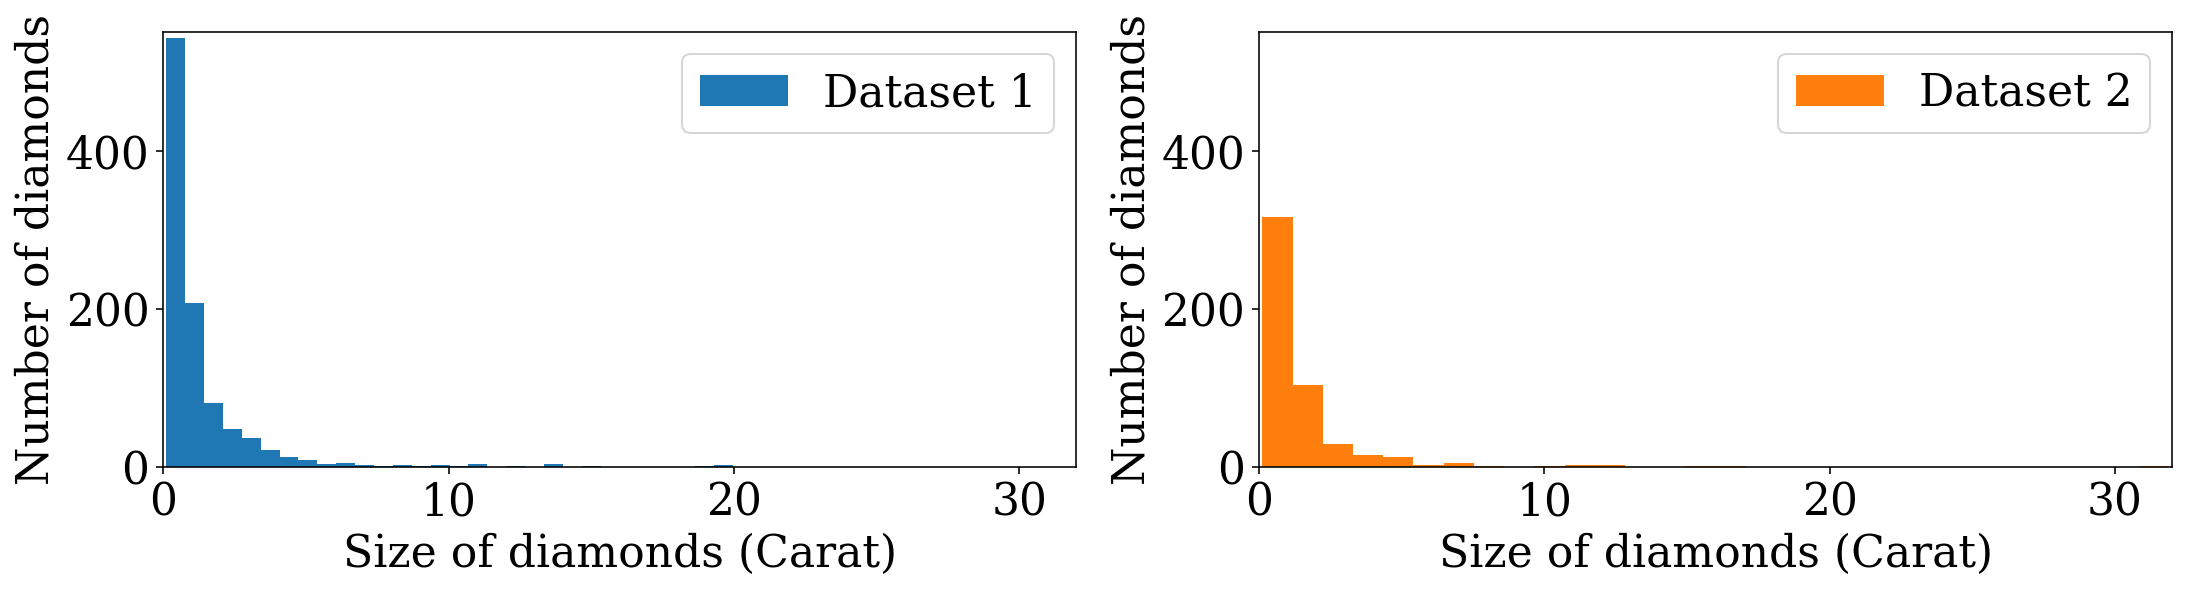

In [ ]:
matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize = [18,4])
ax = plt.subplot(1, 2, 1)
plt.hist(diamond_dataset1,bins = 30,alpha = 1,label = 'Dataset 1')
plt.xlim(0,32)
plt.ylim(0,550)

plt.xlabel('Size of diamonds (Carat)')
plt.ylabel('Number of diamonds')
plt.legend()
ax = plt.subplot(1, 2, 2)
plt.hist(diamond_dataset2,bins = 30,alpha = 1,label = 'Dataset 2',color = 'C1')
plt.xlabel('Size of diamonds (Carat)')
plt.ylabel('Number of diamonds')
plt.xlim(0,32)
plt.ylim(0,550)
plt.legend()

## Mean and variance (1.3.1)

In [ ]:
## Mean of entire datasets
print('Mean of diamond weights, dataset 1: '+str(np.round(np.mean(diamond_dataset1),2))+' ct')
print('Mean of diamond weights, dataset 2: '+str(np.round(np.mean(diamond_dataset2),2))+' ct')

Mean of diamond weights, dataset 1: 1.37 ct
Mean of diamond weights, dataset 2: 1.56 ct


In [ ]:
## Variance of entire datasets
print('Variance of diamond weights, dataset 1: '+str(np.round(np.var(diamond_dataset1),2)))
print('Variance of diamond weights, dataset 2: '+str(np.round(np.var(diamond_dataset2),2)))

Variance of diamond weights, dataset 1: 4.89
Variance of diamond weights, dataset 2: 5.7


If we miss the biggest 3 stones in these two deposits. How does the mean of size of diamonds change?

In [ ]:
sorted_diamond_dataset1 = np.sort(diamond_dataset1)
sorted_diamond_dataset2 = np.sort(diamond_dataset2)
## exclude the biggest x stones: sorted_diamond_dataset1[:-3] 
## exclude the smallest x stones: sorted_diamond_dataset1[3:] 

In [ ]:
print('Mean of diamond weights, dataset 1, removing the biggest 3 stones: '+str(np.round(np.mean(sorted_diamond_dataset1[:-3]),2))+' ct')
print('Mean of diamond weights, dataset 2, removing the biggest 3 stones: '+str(np.round(np.mean(sorted_diamond_dataset2[:-3]),2))+' ct')

Mean of diamond weights, dataset 1, removing the biggest 3 stones: 1.32 ct
Mean of diamond weights, dataset 2, removing the biggest 3 stones: 1.44 ct


In [ ]:
print('Variance of diamond weights, dataset 1, removing the biggest 3 stones: '+str(np.round(np.var(sorted_diamond_dataset1[:-3]),2)))
print('Variance of diamond weights, dataset 2, removing the biggest 3 stones: '+str(np.round(np.var(sorted_diamond_dataset2[:-3]),2)))

Variance of diamond weights, dataset 1, removing the biggest 3 stones: 3.88
Variance of diamond weights, dataset 2, removing the biggest 3 stones: 3.08


## Quantile plots (1.3.2)



### What is quantile? 

*   Quantile is a value of a dataset or a distrubution model related to the rank order of values in that distribution.
*   For example, 25% quantile is the value in a dataset at which 25% percent is less or equal than this value.
*   Median: 50% quantile or middle quantile



Ex. The 25% quantile of deposit 2 is:


In [ ]:
print(str(np.quantile(diamond_dataset2,0.25))+' ct') # 25% quantile

0.5325708996163748 ct


### Quantile-Quantile plot
Calculate quantiles for the two distributions, and plot first dataset quantiles against second dataset quantiles. 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Quantile-Quantile plot')

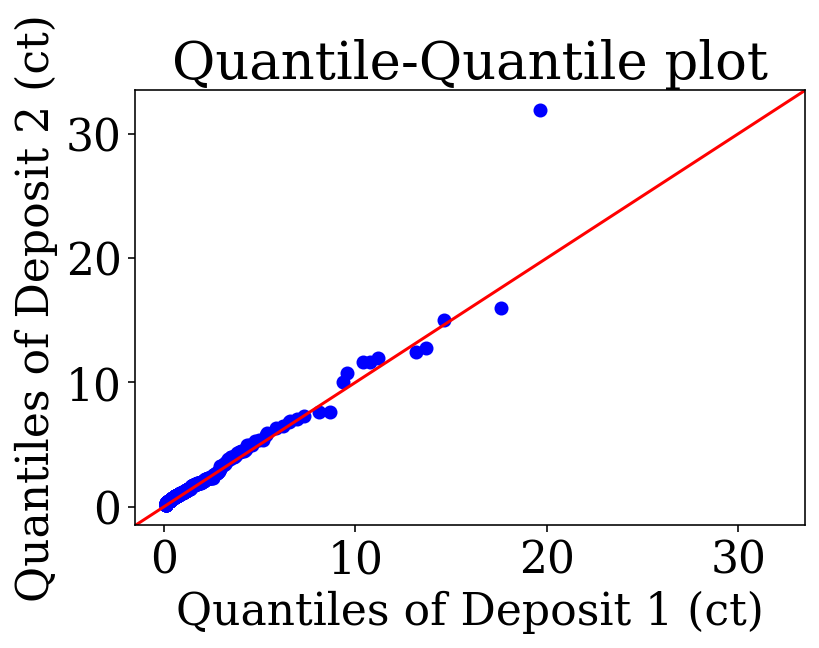

In [ ]:
from statsmodels.graphics.gofplots import qqplot_2samples
## QQplot
qqplot_2samples(diamond_dataset2,diamond_dataset1,line='45')
plt.xlabel('Quantiles of Deposit 1 (ct)')
plt.ylabel('Quantiles of Deposit 2 (ct)')
plt.title('Quantile-Quantile plot')

## Logarithm （1.3.3）
Extreme values or a skewed distribution is not easy to be investigated in histogram plots. The simplest way to reduce the skewness of extreme value distributions, is to take the logarithm. 

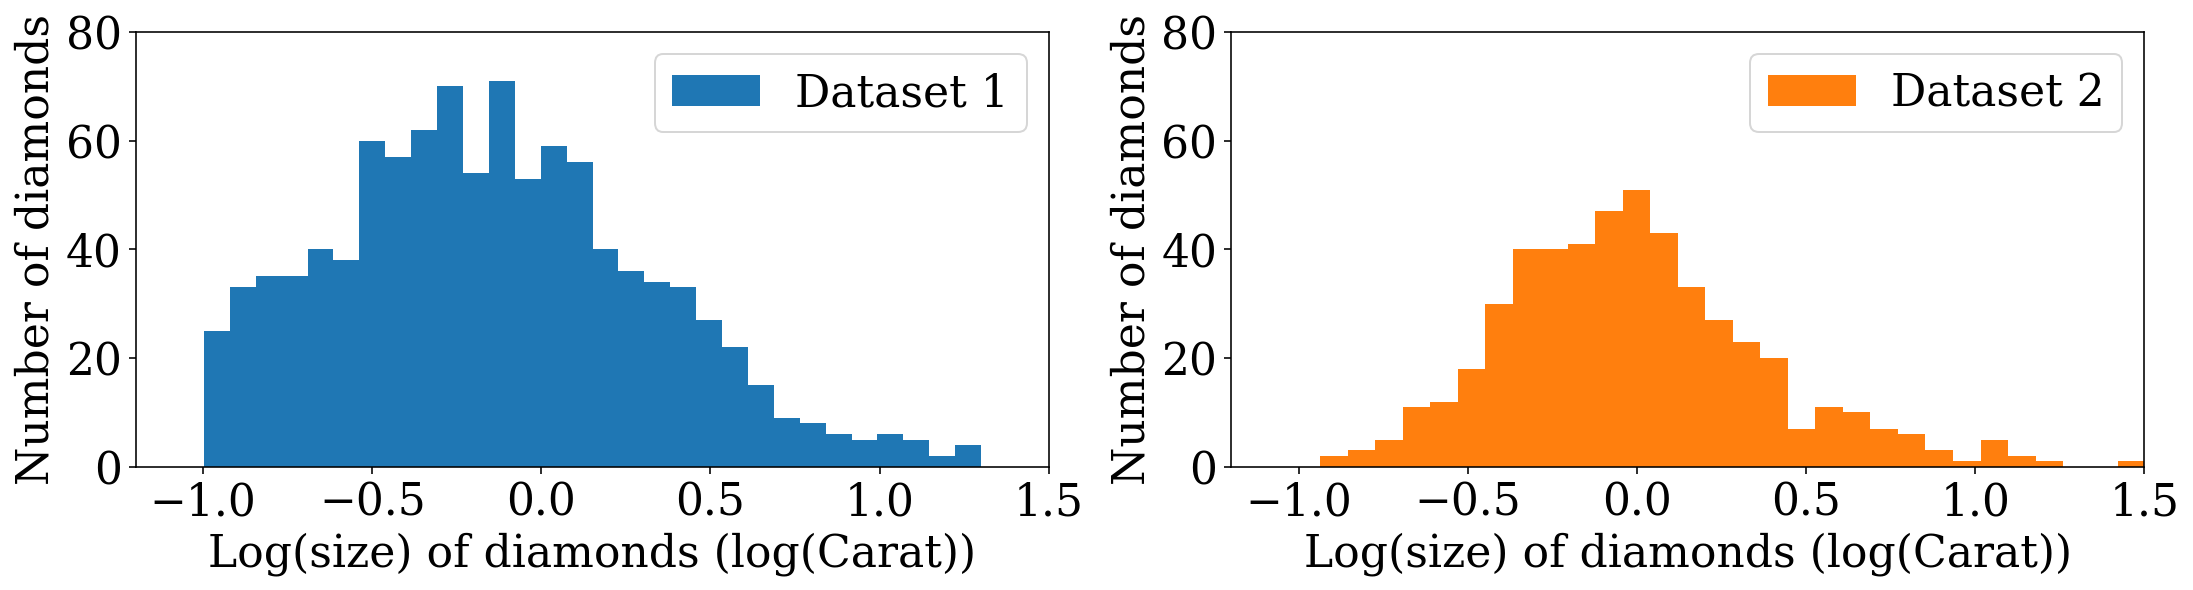

In [ ]:
plt.figure(figsize = [18,4])
ax = plt.subplot(1, 2, 1)
plt.hist(np.log10(diamond_dataset1),bins = 30,alpha = 1,label = 'Dataset 1')
plt.xlim(-1.2,1.5)
plt.ylim(0,80)

plt.xlabel('Log(size) of diamonds (log(Carat))')
plt.ylabel('Number of diamonds')
plt.legend()
ax = plt.subplot(1, 2, 2)
plt.hist(np.log10(diamond_dataset2),bins = 30,alpha = 1,label = 'Dataset 2',color = 'C1')
plt.xlabel('Log(size) of diamonds (log(Carat))')
plt.ylabel('Number of diamonds')
plt.xlim(-1.2,1.5)
plt.ylim(0,80)
plt.legend()


After taking the logarithm, our sampled data is more evenly distributed, and more similar to the normal distribution in basic statistics.